## Distributions

<li>Learning how to represent distributions using Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs)</li>
<li>Learning when to use each of them, and why, while working with a new dataset obtained from the General Social Survey.</li>

In [24]:
import pandas as pd
import numpy as np
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from scipy.stats import norm

file_path = '/Users/joycemungai/datacamp/exploratory_data_analysis/datasets/'

In [3]:
gss = pd.read_hdf(file_path + 'gss.hdf5')

gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


### Probability Mass Function (PMF)

Gives the probability that a discrete random variable is exactly equal to some value.

#### Make a PMF

In [4]:
#make a PMF for year
pmf_year = Pmf.from_seq(gss['year'], normalize=False)
pmf_year

,probs
1972,1613
1973,1504
1974,1484
1975,1490
1976,1499
1977,1530
1978,1532
1980,1468
1982,1860
1983,1599


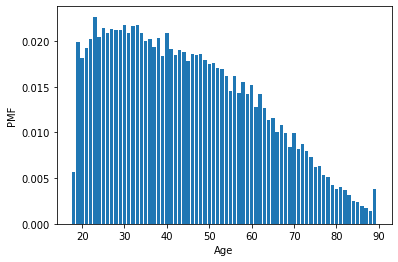

In [7]:
#Plot bar chart for Age PMF
age = gss['age']
pmf_age = Pmf.from_seq(age, normalize=True)

pmf_age.bar()
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

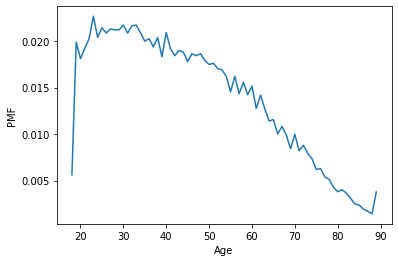

In [9]:
#to plot a line graph
pmf_age.plot()
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

### Cumulative Distribution Function

#### Make a CDF

In [12]:
age = gss['age']

cdf_age = Cdf.from_seq(age)

print(cdf_age(30))

#respondents in the GSS dataset are OLDER than 30
print(1-cdf_age(30))

0.2539137136526389
0.7460862863473612


#### Compute IQR

Interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In [17]:
#compute the interquartile range of income

realinc = gss['realinc']

cdf_income = Cdf.from_seq(realinc)

#Calculate the 75th percentile of income 
percentile_75th = cdf_income.inverse(0.75)
#Calculate the 25th percentile of income
percentile_25th = cdf_income.inverse(0.25)

#interquartile range (IQR) of income
iqr = percentile_75th - percentile_25th

print(iqr)

29676.0


#### Plot a CDF

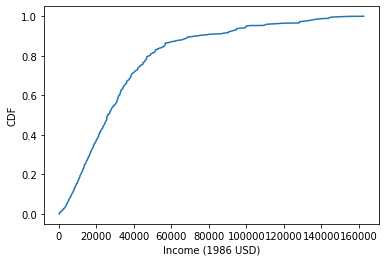

In [18]:
income = gss['realinc']

cdf_income = Cdf.from_seq(income)

cdf_income.plot()

plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()


#### Distribution of education

In [19]:
#fraction of respondents report that they have 12 years of education or fewer
Cdf.from_seq(gss['educ'])

#53% has <=12 years of education

,probs
0.0,0.002311
1.0,0.002921
2.0,0.005345
3.0,0.009293
4.0,0.013948
5.0,0.020031
6.0,0.033545
7.0,0.047348
8.0,0.086206
9.0,0.117713


#### Extract education levels

<li>12 years: High school</li>
<li>14 years: Associate Degree</li>
<li>16 years: Bachelors Degree</li>

In [20]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16 )

# High school (12 or fewer years of education)
high = (educ<= 12)
print(high.mean())

0.5308807991547402


#### Plot income CDFs

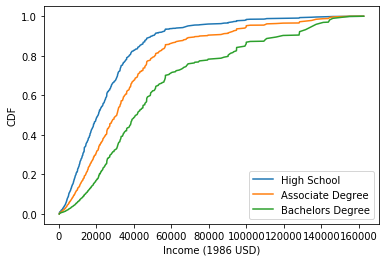

In [22]:
income = gss['realinc']

#plot cdfs
Cdf.from_seq(income[high]).plot(label = 'High School')
Cdf.from_seq(income[assc]).plot(label = 'Associate Degree')
Cdf.from_seq(income[bach]).plot(label = 'Bachelors Degree')


# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

#### Distribution of income

In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution

In [25]:
#compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

income = gss['realinc']
log_income = np.log10(income)

#compute mean and std deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

#make a norm object
dist= norm(mean,std)

4.371148677934171 0.4290082383271385


#### Comparing CDFs
To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation

.cdf()evaluates the normal cumulative distribution function.

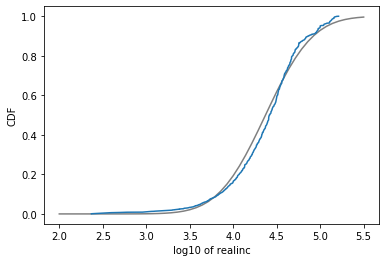

In [26]:
#Evaluate model
xs = np.linspace(2, 5.5) #Returns num evenly spaced samples, calculated over the interval [start, stop].
ys = dist.cdf(xs)

#plot model
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

The lognormal model is a pretty good fit for the data, but clearly not a perfect match

#### Comparing PDFs

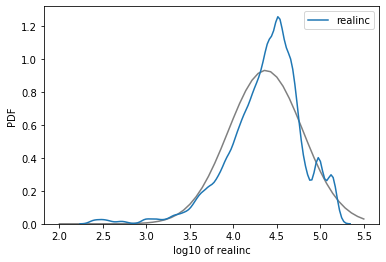

In [27]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()